<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Outside-Research---Exploring-NYC-Open-Data" data-toc-modified-id="Outside-Research---Exploring-NYC-Open-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Outside Research - Exploring NYC Open Data</a></span><ul class="toc-item"><li><span><a href="#Importing-libaries-and-data" data-toc-modified-id="Importing-libaries-and-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing libaries and data</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Observing-accidents-by-date-and-time" data-toc-modified-id="Observing-accidents-by-date-and-time-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Observing accidents by date and time</a></span></li><li><span><a href="#Examining-number-of-accidents-by-borough" data-toc-modified-id="Examining-number-of-accidents-by-borough-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Examining number of accidents by borough</a></span></li></ul></li><li><span><a href="#EDA---Exploring-the-TomTom-Data" data-toc-modified-id="EDA---Exploring-the-TomTom-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA - Exploring the TomTom Data</a></span><ul class="toc-item"><li><span><a href="#Importing-TomTom-data" data-toc-modified-id="Importing-TomTom-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Importing TomTom data</a></span></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data cleaning</a></span></li><li><span><a href="#Separating-coordinates" data-toc-modified-id="Separating-coordinates-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Separating coordinates</a></span></li><li><span><a href="#Observing-common-types-of-incidents" data-toc-modified-id="Observing-common-types-of-incidents-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Observing common types of incidents</a></span></li><li><span><a href="#Observing-accidents-by-date-and-time" data-toc-modified-id="Observing-accidents-by-date-and-time-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Observing accidents by date and time</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Outside Research - Exploring NYC Open Data

## Importing libaries and data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import color_palette
%matplotlib inline
df = pd.read_csv('collisions.csv')

## Data Cleaning

In [4]:
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2020-02-10,7:00,NaN,NaN,40.811030,-73.921490,POINT (-73.92149 40.81103),EAST 141 STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4286591,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-02-10,19:55,BROOKLYN,11216.0,40.679634,-73.949590,POINT (-73.94959 40.679634),NOSTRAND AVENUE,HERKIMER STREET,NaN,...,NaN,NaN,NaN,NaN,4287283,Sedan,NaN,NaN,NaN,NaN
2,2020-02-10,10:50,QUEENS,11355.0,40.755390,-73.828285,POINT (-73.828285 40.75539),MAIN STREET,MAPLE AVENUE,NaN,...,Passing or Lane Usage Improper,NaN,NaN,NaN,4286357,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
3,2020-02-10,7:48,STATEN ISLAND,10305.0,40.600180,-74.064644,POINT (-74.064644 40.60018),LILY POND AVENUE,MAJOR AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4286350,Sedan,NaN,NaN,NaN,NaN
4,2020-02-10,15:00,BRONX,10451.0,40.816696,-73.923096,POINT (-73.923096 40.816696),MORRIS AVENUE,EAST 148 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4286596,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [5]:
df.shape

(18748, 29)

In [6]:
df.isnull().sum()

CRASH DATE                           0
CRASH TIME                           0
BOROUGH                           6274
ZIP CODE                          6278
LATITUDE                          1519
LONGITUDE                         1519
LOCATION                          1519
ON STREET NAME                    4547
CROSS STREET NAME                 9238
OFF STREET NAME                  14201
NUMBER OF PERSONS INJURED            0
NUMBER OF PERSONS KILLED             0
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
CONTRIBUTING FACTOR VEHICLE 1       77
CONTRIBUTING FACTOR VEHICLE 2     3395
CONTRIBUTING FACTOR VEHICLE 3    17408
CONTRIBUTING FACTOR VEHICLE 4    18430
CONTRIBUTING FACTOR VEHICLE 5    18665
COLLISION_ID                         0
VEHICLE TYPE CODE 1                156
VEHICLE TYPE CODE 2      

In [7]:
df.drop(columns={'OFF STREET NAME', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 
                 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
                 'VEHICLE TYPE CODE 5'}, inplace=True)

These columns can be safely removed, as they contain too many nulls and only provide extraneous detail that is not useful for addressing our problem.

In [8]:
df.isnull().sum()

CRASH DATE                          0
CRASH TIME                          0
BOROUGH                          6274
ZIP CODE                         6278
LATITUDE                         1519
LONGITUDE                        1519
LOCATION                         1519
ON STREET NAME                   4547
CROSS STREET NAME                9238
NUMBER OF PERSONS INJURED           0
NUMBER OF PERSONS KILLED            0
NUMBER OF PEDESTRIANS INJURED       0
NUMBER OF PEDESTRIANS KILLED        0
NUMBER OF CYCLIST INJURED           0
NUMBER OF CYCLIST KILLED            0
NUMBER OF MOTORIST INJURED          0
NUMBER OF MOTORIST KILLED           0
CONTRIBUTING FACTOR VEHICLE 1      77
CONTRIBUTING FACTOR VEHICLE 2    3395
COLLISION_ID                        0
VEHICLE TYPE CODE 1               156
VEHICLE TYPE CODE 2              4486
dtype: int64

In [9]:
df.dropna(inplace=True)

The visualizations below deal with date and time, which have no nulls, and borough, for which we only want to examine named locations. Nulls can be dropped in order to create these visuals.

In [10]:
df.dtypes

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                         float64
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
COLLISION_ID                       int64
VEHICLE TYPE CODE 1               object
VEHICLE TYPE CODE 2               object
dtype: object

In [11]:
df[['CRASH DATE', 'CRASH TIME']].head()

,CRASH DATE,CRASH TIME
2,2020-02-10,10:50
6,2020-02-10,8:15
13,2020-02-10,14:30
24,2020-02-10,16:10
26,2020-02-10,1:20


These columns will need to be converted to datetime in order to properly visualize them.

## Observing accidents by date and time

In [12]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'])

In [36]:
df['day'] = df['CRASH DATE'].dt.dayofweek
df['day'] = df['day'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

df['hour'] = df['CRASH TIME'].dt.hour

In [19]:
hour_0 = RTAs_by_hour(df, 0) # Code by Meraldo Antonio
hour_1 = RTAs_by_hour(df, 1)
hour_2 = RTAs_by_hour(df, 2)
hour_3 = RTAs_by_hour(df, 3)
hour_4 = RTAs_by_hour(df, 4)
hour_5 = RTAs_by_hour(df, 5)
hour_6 = RTAs_by_hour(df, 6)
hour_7 = RTAs_by_hour(df, 7)
hour_8 = RTAs_by_hour(df, 8)
hour_9 = RTAs_by_hour(df, 9)
hour_10 = RTAs_by_hour(df, 10)
hour_11 = RTAs_by_hour(df, 11)
hour_12 = RTAs_by_hour(df, 12)
hour_13 = RTAs_by_hour(df, 13)
hour_14 = RTAs_by_hour(df, 14)
hour_15 = RTAs_by_hour(df, 15)
hour_16 = RTAs_by_hour(df, 16)
hour_17 = RTAs_by_hour(df, 17)
hour_18 = RTAs_by_hour(df, 18)
hour_19 = RTAs_by_hour(df, 19)
hour_20 = RTAs_by_hour(df, 20)
hour_21 = RTAs_by_hour(df, 21)
hour_22 = RTAs_by_hour(df, 22)
hour_23 = RTAs_by_hour(df, 23)
hour_24 = RTAs_by_hour(df, 24)

In [20]:
columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"] # Code by Meraldo Antonio
rows = ["0", "1am", "2am", "3am", "4am", "5am", "6am", "7am", "8am", "9am", "10am", "11am", "12pm", "1pm", "2pm", "3pm","4pm","5pm","6pm","7pm","8pm","9pm","10pm","11pm"]
data = np.array([hour_0, hour_1, hour_2, hour_3, hour_4, hour_5, hour_6, hour_7, hour_8, hour_9, hour_10, hour_11, hour_12, hour_13, hour_14, hour_15, hour_16, hour_17, hour_18, hour_19, hour_20, hour_21, hour_22, hour_23])
heatmap_hour = pd.DataFrame(data=data, index=rows, columns=columns)

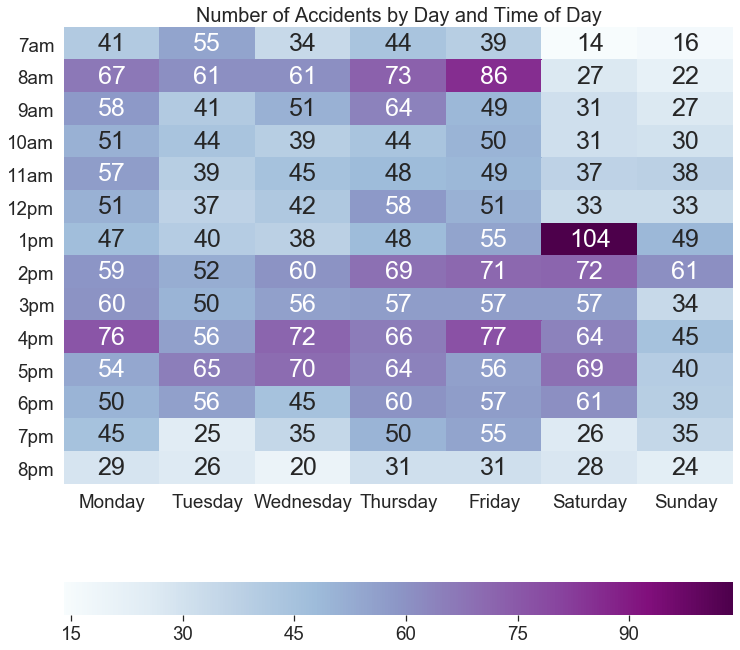

In [37]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(heatmap_hour[7:21], annot=True, fmt="d", cmap='BuPu', cbar_kws={"orientation": "horizontal"},
                annot_kws={"size": 25})
ax.set_title("Number of Accidents by Day and Time of Day", fontsize=20)
sns.set(font_scale=1.7)

Road density is most concentrated in the morning and afternoon, which is consistent with typcial rush hours in New York City. Thursday, Friday, and Saturday are generally the busiest days, which 1 PM on Saturday having the highest number of road closures. Curiously, Thursday morning stands out as a particularly congested time slot.

## Examining number of accidents by borough

[Text(0, 0, 'QUEENS'),
 Text(0, 0, 'BROOKLYN'),
 Text(0, 0, 'MANHATTAN'),
 Text(0, 0, 'BRONX'),
 Text(0, 0, 'STATEN ISLAND')]

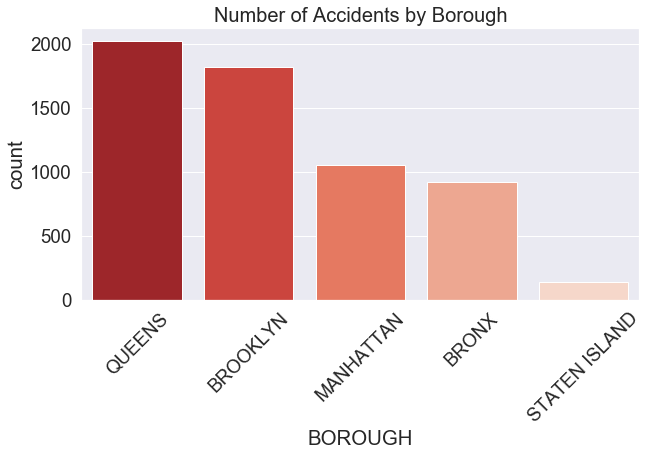

In [38]:
plt.figure(figsize=(10,5))
p = sns.countplot(df['BOROUGH'], order=df['BOROUGH'].value_counts().index, palette="Reds_r")
p.set_title('Number of Accidents by Borough', fontsize=20)
p.set_xticklabels(p.get_xticklabels(), rotation=45)

This plot tells us that we can expect more traffic in Brooklyn than in Manhattan. This is likely because of congestion in Brooklyn caused by the Brookly-Queens Expressway.

# EDA - Exploring the TomTom Data

## Importing TomTom data

In [52]:
data = pd.read_csv('df_db.csv')
data.head()

,coord,day,delay,description,end_date,from,geometry,hour,id,index,latitude,length,level_0,longitude,month,num_of_incidents,road_condition,to
0,"{'x': -73.9743662, 'y': 40.7783631}",Tuesday,0,roadworks,2020-02-25 05:43:59+00:00,Central Park W,POINT (-73.97436620000001 40.7783631),5.0,TTR5158489041614001,0.0,40.778363,272,0.0,-73.974366,February,NaN,NaN,Broadway
1,"{'x': -73.9803143, 'y': 40.7544967}",Thursday,1,slow traffic,2020-02-13 17:41:00+00:00,5th Ave (50th St),POINT (-73.9803143 40.7544967),17.0,TTL5159643158406005,1.0,40.754497,299,1.0,-73.980314,February,NaN,NaN,Park Ave (E 50th St)
2,"{'x': -73.9851146, 'y': 40.7730232}",Thursday,1,slow traffic,2020-02-13 17:41:00+00:00,Broadway,POINT (-73.9851146 40.7730232),17.0,TTL5157911932806006,2.0,40.773023,487,2.0,-73.985115,February,NaN,NaN,Central Park W
3,"{'x': -73.985892, 'y': 40.7671613}",Tuesday,0,roadworks,2020-03-31 04:43:59+00:00,W 57th St (7th Ave),POINT (-73.98589200000001 40.7671613),4.0,TTR5159066100004001,3.0,40.767161,78,3.0,-73.985892,March,NaN,NaN,W 50th St (7th Ave)
4,"{'x': -73.9823474, 'y': 40.7537168}",Thursday,1,slow traffic,2020-02-13 17:41:00+00:00,6th Ave/Avenue of the Americas (W 48th St),POINT (-73.98234739999999 40.7537168),17.0,TTL5159643158406004,4.0,40.753717,421,4.0,-73.982347,February,NaN,NaN,Park Ave (E 48th St)


This dataset has a specific column describing the condition of roads. We want our analysis to address various types of road closure.

## Data cleaning

In [53]:
data.shape

(1551, 18)

In [54]:
data.isnull().sum()

coord                 0
day                  76
delay                 0
description           0
end_date             76
from                  0
geometry              0
hour                 76
id                    0
index               942
latitude              0
length                0
level_0             814
longitude             0
month               741
num_of_incidents    255
road_condition      374
to                    0
dtype: int64

We are most interested in exploring counts within the 'description' column. The column has no nulls, so we will proceed.

## Separating coordinates

In [ ]:
for i,val in enumerate(df['coord']):
    df['x'] = df['coord'][i].split(' ')[1].replace(',', '')
for i,val in enumerate(df['coord']):
    df['y'] = df['coord'][i].split(' ')[3].replace('}', '')
    
df['x'] = df['x'].astype(float)
df['y'] = df['y'].astype(float)

The raw data only lists coordinates as a single object. This code separates latitude and longitude into two columns of floats. The coordinates are much more usable this way.

## Observing common types of incidents

[Text(0, 0, 'roadworks'),
 Text(0, 0, 'slow traffic'),
 Text(0, 0, 'queuing traffic'),
 Text(0, 0, 'stationary traffic'),
 Text(0, 0, 'construction work'),
 Text(0, 0, 'closed'),
 Text(0, 0, 'maintenance work'),
 Text(0, 0, 'major roadworks'),
 Text(0, 0, 'major event'),
 Text(0, 0, 'left lane closed'),
 Text(0, 0, 'one lane closed'),
 Text(0, 0, 'bridge closed'),
 Text(0, 0, 'accident'),
 Text(0, 0, 'right lane closed'),
 Text(0, 0, 'two lanes closed'),
 Text(0, 0, 'lane closed')]

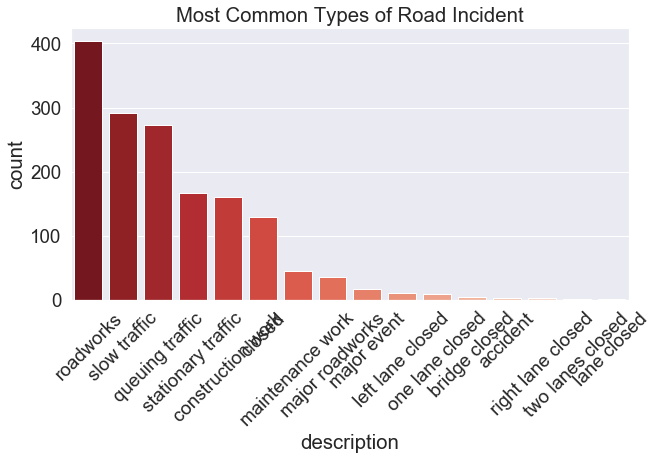

In [55]:
plt.figure(figsize=(10,5))
p = sns.countplot(x=data['description'], order=data['description'].value_counts().index, palette="Reds_r")
p.set_title("Most Common Types of Road Incident")
#p.set_xticklabels(rotation=45)
p.set_xticklabels(p.get_xticklabels(), rotation=45)

The most common types of road incident are related to road works, slow traffic, or gridlock. The NYC Open Data only covers accidents, so this dataset from TomTom is much more comprehensive. Construction and congestion are the biggest factors to consider when planning an evacuation route.

## Observing accidents by date and time

In [49]:
def RTAs_by_hour(df, hour): # Code by Meraldo Antonio
    hour_list = []
    mon, tues, wed, thurs, fri, sat, sun = 0,0,0,0,0,0,0
    
    for idx, row in df.iterrows():
        if row["hour"] == hour and row["day"] == "Monday": mon +=1
        elif row["hour"] == hour and row["day"] == "Tuesday": tues +=1
        elif row["hour"] == hour and row["day"] == "Wednesday": wed +=1
        elif row["hour"] == hour and row["day"] == "Thursday": thurs +=1
        elif row["hour"] == hour and row["day"] == "Friday": fri +=1
        elif row["hour"] == hour and row["day"] == "Saturday": sat +=1
        elif row["hour"] == hour and row["day"] == "Sunday": sun +=1
        else: a=0 

    hour_list.append(mon)
    hour_list.append(tues)
    hour_list.append(wed)
    hour_list.append(thurs)
    hour_list.append(fri)
    hour_list.append(sat)
    hour_list.append(sun)
    
    total = mon+tues+wed+thurs+fri+sat+sun
    
    return(hour_list)

hour_0 = RTAs_by_hour(data, 0) # Code by Meraldo Antonio
hour_1 = RTAs_by_hour(data, 1)
hour_2 = RTAs_by_hour(data, 2)
hour_3 = RTAs_by_hour(data, 3)
hour_4 = RTAs_by_hour(data, 4)
hour_5 = RTAs_by_hour(data, 5)
hour_6 = RTAs_by_hour(data, 6)
hour_7 = RTAs_by_hour(data, 7)
hour_8 = RTAs_by_hour(data, 8)
hour_9 = RTAs_by_hour(data, 9)
hour_10 = RTAs_by_hour(data, 10)
hour_11 = RTAs_by_hour(data, 11)
hour_12 = RTAs_by_hour(data, 12)
hour_13 = RTAs_by_hour(data, 13)
hour_14 = RTAs_by_hour(data, 14)
hour_15 = RTAs_by_hour(data, 15)
hour_16 = RTAs_by_hour(data, 16)
hour_17 = RTAs_by_hour(data, 17)
hour_18 = RTAs_by_hour(data, 18)
hour_19 = RTAs_by_hour(data, 19)
hour_20 = RTAs_by_hour(data, 20)
hour_21 = RTAs_by_hour(data, 21)
hour_22 = RTAs_by_hour(data, 22)
hour_23 = RTAs_by_hour(data, 23)
hour_24 = RTAs_by_hour(data, 24)

columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"] # Code by Meraldo Antonio
rows = ["0", "1am", "2am", "3am", "4am", "5am", "6am", "7am", "8am", "9am", "10am", "11am", "12pm", "1pm", "2pm", "3pm","4pm","5pm","6pm","7pm","8pm","9pm","10pm","11pm"]
data = np.array([hour_0, hour_1, hour_2, hour_3, hour_4, hour_5, hour_6, hour_7, hour_8, hour_9, hour_10, hour_11, hour_12, hour_13, hour_14, hour_15, hour_16, hour_17, hour_18, hour_19, hour_20, hour_21, hour_22, hour_23])
heatmap_hour = pd.DataFrame(data=data, index=rows, columns=columns)

Text(0.5, 1, 'Road Incidents by Day and Time of Day')

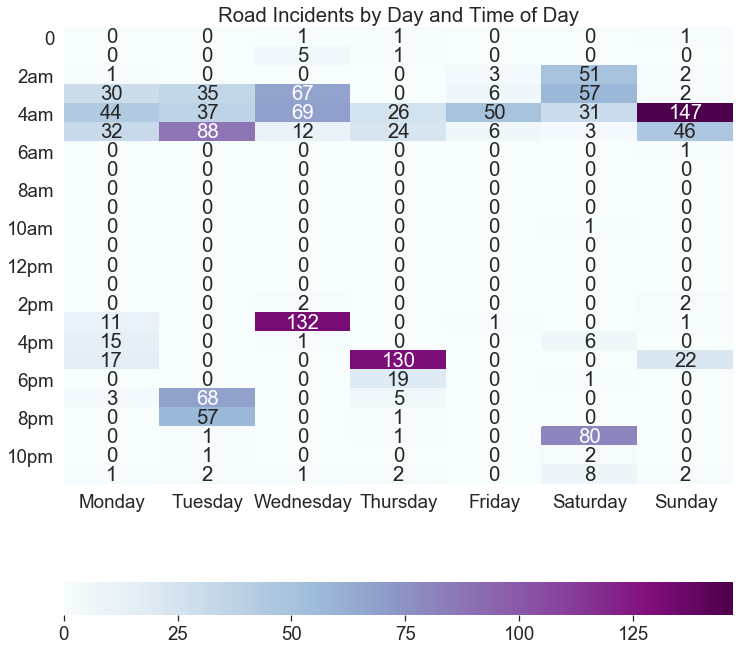

In [50]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(heatmap_hour, annot=True, fmt="d", cmap='BuPu', cbar_kws={"orientation": "horizontal"} )
ax.set_title("Road Incidents by Day and Time of Day")

We were curious to see if accidents occur at the same times as more common types of road incident. These incidents are common between 2-5 AM, with some lighter concentration during rush hours across the week. The highest concentration on Wednesday and Thursday may be due to rush hour traffic. It is curious that more incidents occur in the early morning hours, even though construction in NYC is restricted to 7 AM - 6 PM. The past 3 years have seen an increase noise complaints involving after-hours construction.

# Conclusion

Our analysis shows that data collected from the TomTom API offers a fuller sense of traffic and road incidents. Although the NYC Open Data dataset is comprehensive, we see that the TomTom data can better say which types of incidents are more common and offers different insights into when incidents happen. The TomTom data is clearly valuable for predicting evacuation routes, because it demonstrates that measuring collisions alone is not enough to understand many possible events that can cause traffic. This data confirms certain observations on when incidents are most likely to happen, but also raises new questions about why certain events may happen when they do, as seen in the heatmap above.